<a href="https://colab.research.google.com/github/IngaBesedina/AI_ML_3/blob/main/LabWork3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Лабораторная работа 3
## Метрические методы классификации

In [1]:
# Подгрузка данных
!wget https://raw.githubusercontent.com/IngaBesedina/AI_ML_1/main/SeedsData/seeds.data

--2024-03-26 09:16:34--  https://raw.githubusercontent.com/IngaBesedina/AI_ML_1/main/SeedsData/seeds.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10033 (9.8K) [text/plain]
Saving to: ‘seeds.data’

seeds.data          100%[===================>]   9.80K  --.-KB/s    in 0s      

2024-03-26 09:16:34 (75.1 MB/s) - ‘seeds.data’ saved [10033/10033]



In [6]:
import pandas as pd
import numpy as np

data_source = 'seeds.data'
d = pd.read_table(data_source, delimiter=',',
                  header=None,
                  names=['Area','Perimetr', 'Compactness',
                         'Kernel Length','Kernel Width',
                         'Asymmetry Coeff', 'Kernel Groove',
                         'answer'])
d.head()

,Area,Perimetr,Compactness,Kernel Length,Kernel Width,Asymmetry Coeff,Kernel Groove,answer
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,class_1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,class_1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,class_1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,class_1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,class_1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimetr         199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel Length    199 non-null    float64
 4   Kernel Width     199 non-null    float64
 5   Asymmetry Coeff  199 non-null    float64
 6   Kernel Groove    199 non-null    float64
 7   class            199 non-null    object 
dtypes: float64(7), object(1)
memory usage: 12.6+ KB


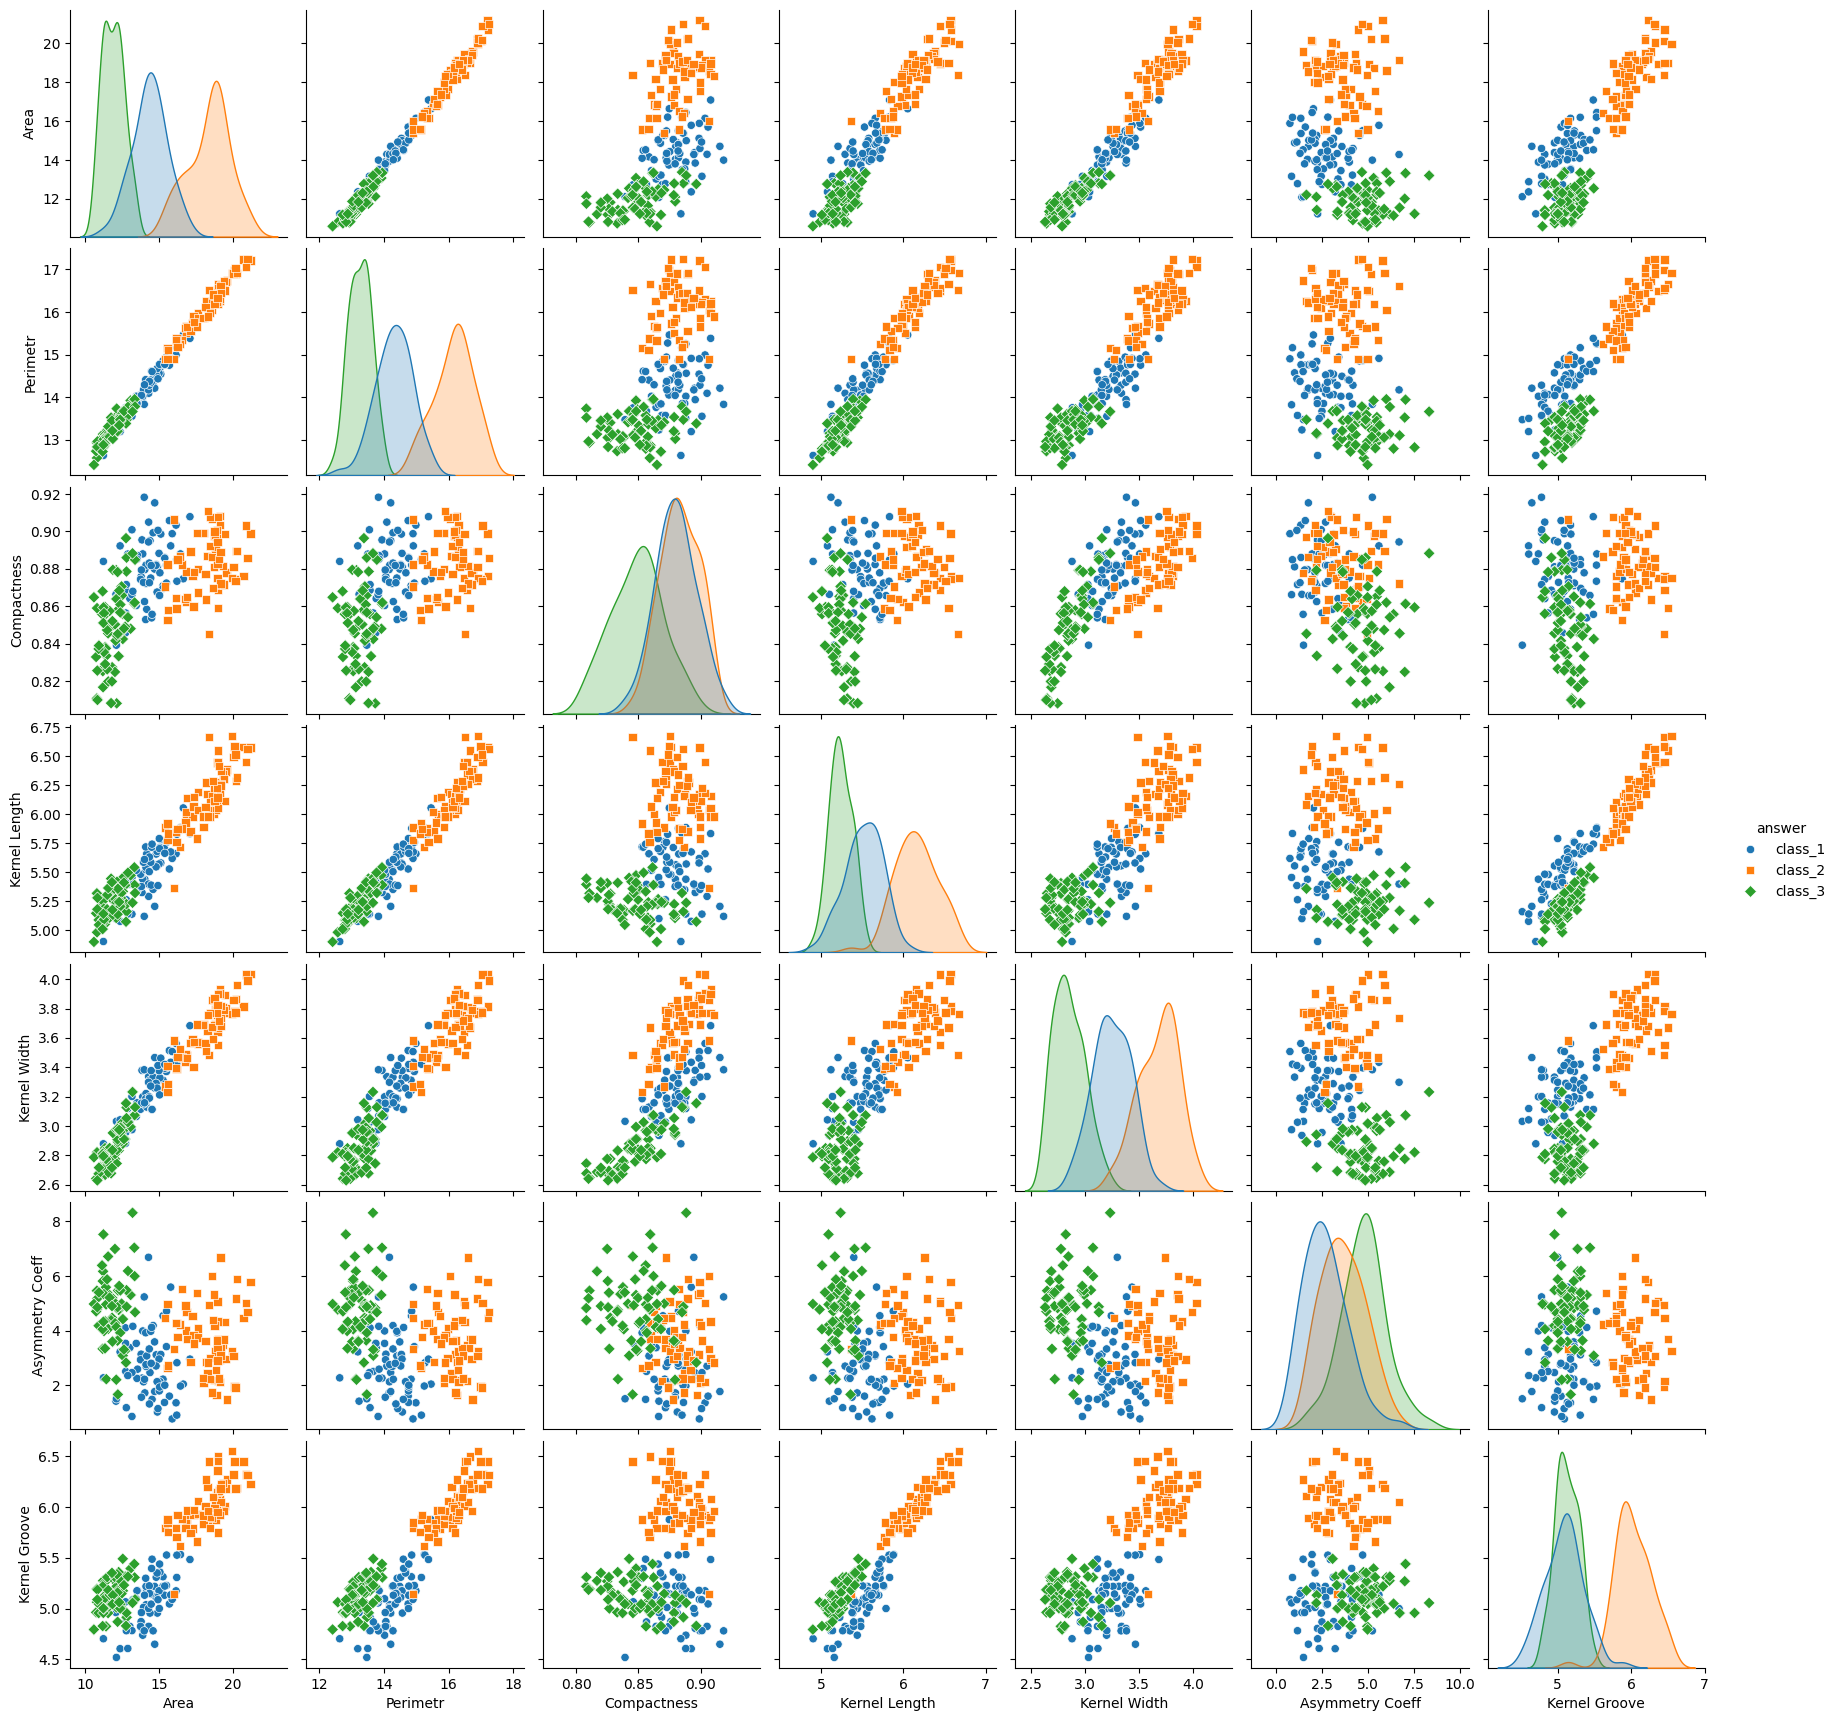

In [7]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d, hue='answer', markers=["o", "s", "D"])

In [8]:
from sklearn.neighbors import KNeighborsClassifier

X_train = d[['Area','Perimetr', 'Compactness',
             'Kernel Length','Kernel Width',
             'Asymmetry Coeff', 'Kernel Groove']]
y_train = d['answer']

K = 3

# Создание и настройка классификатора
knn = KNeighborsClassifier(n_neighbors=K)
# построение модели классификатора (процедура обучения)
knn.fit(X_train.values, y_train)

# Использование классификатора
# Объявление признаков объекта
X_test = np.array([[18.13, 16.34, 0.9086, 6.715, 3.712, 4.933, 6.567]])
# Получение ответа для нового объекта
target = knn.predict(X_test)
print(target)


['class_2']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_holdout, y_train, y_holdout = train_test_split(
    d.iloc[ :, 0:4 ],
    d['answer'],
    test_size=0.3,
    random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print('accuracy: ', accur)

accuracy:  0.9


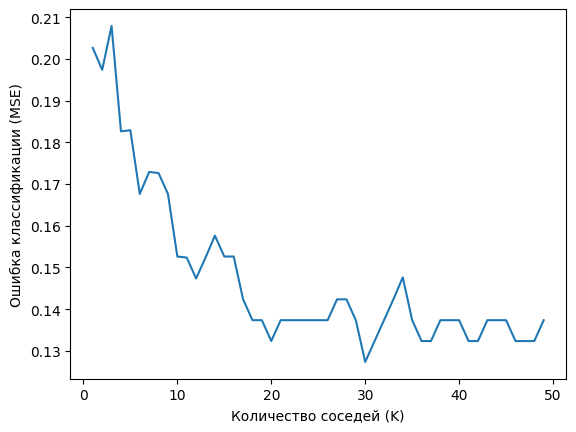

Оптимальные значения K:  [30]


In [10]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Значения параметра K
k_list = list(range(1,50))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for K in k_list:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, d.iloc[ : , 0:4 ], d['answer'], cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(k_list, MSE)
plt.xlabel('Количество соседей (K)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
k_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_k_min = []
for i in range(len(MSE)):
    if MSE[i] <= k_min:
        all_k_min.append(k_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения K: ', all_k_min)


Палитры, которые можно использовать для визуализации

In [11]:
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

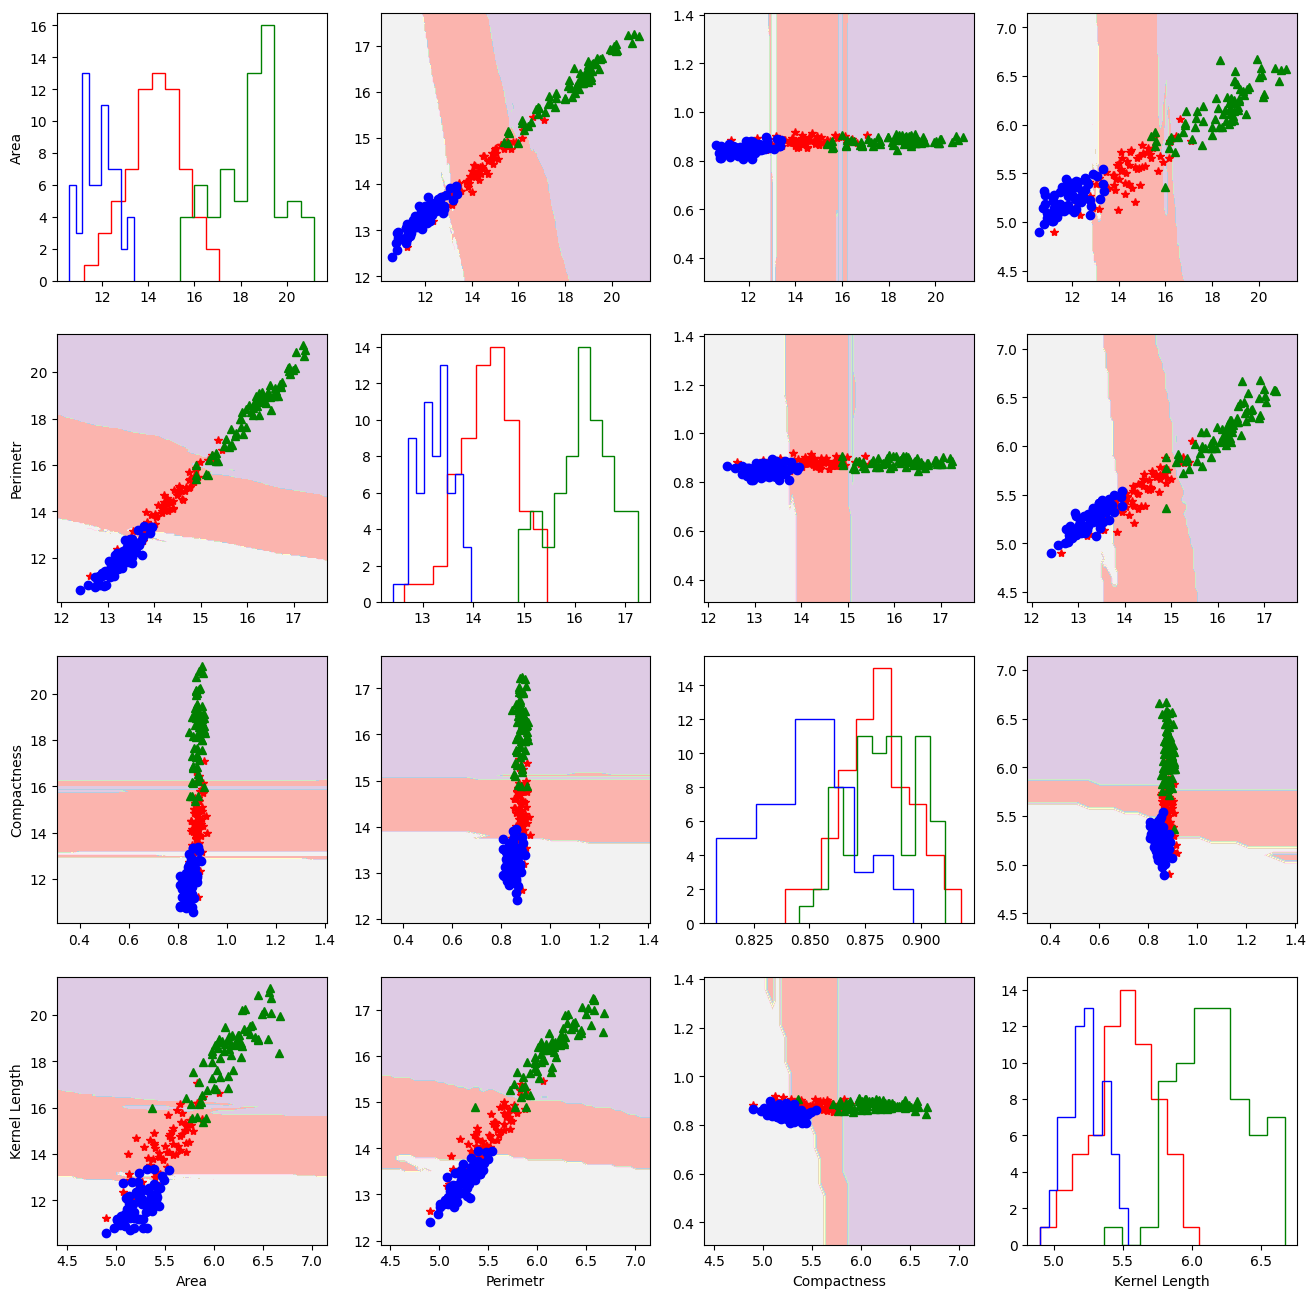

In [12]:
dX = d.iloc[:,0:4]
dy = d['answer']

plot_markers = ['r*', 'g^', 'bo']
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min()-0.5
fmax = dX.max()+0.5
plot_step = 0.05

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):

        # Строим решающие границы
        if(i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                               np.arange(fmin[j], fmax[j], plot_step))
            model = KNeighborsClassifier(n_neighbors=13)
            model.fit(dX.iloc[:, [i,j]].values, dy)
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            p = p.reshape(xx.shape)
            p[p==answers[0]] = 0
            p[p==answers[1]] = 1
            p[p==answers[2]] = 2
            p=p.astype('int32')
            places[i,j].contourf(xx, yy, p, cmap='Pastel1')

        # Обход всех классов
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            if i==j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        if j==0:
            places[i, j].set_ylabel(dX.columns[i])

        if i==3:
            places[i, j].set_xlabel(dX.columns[j])


